<a href="https://colab.research.google.com/github/Rito43/Rito43/blob/main/Transferlearning_mobilenet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

dataset_path = '/content/drive/MyDrive/ISIC2016'

In [ ]:

import os
import cv2
import matplotlib.pyplot as plt

train_path = os.path.join(dataset_path, 'train')
train_masks_path = os.path.join(dataset_path, 'train_masks')
test_path = os.path.join(dataset_path, 'test')
test_masks_path = os.path.join(dataset_path, 'test_masks')


def display_images(folder_path, num_images=5):
    images = os.listdir(folder_path)[:num_images]
    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(images):
        image = cv2.imread(os.path.join(folder_path, image_name))
        plt.subplot(1, num_images, i+1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(image_name)
        plt.axis('off')
    plt.show()


Displaying 5 images from each folder:

Train Folder:


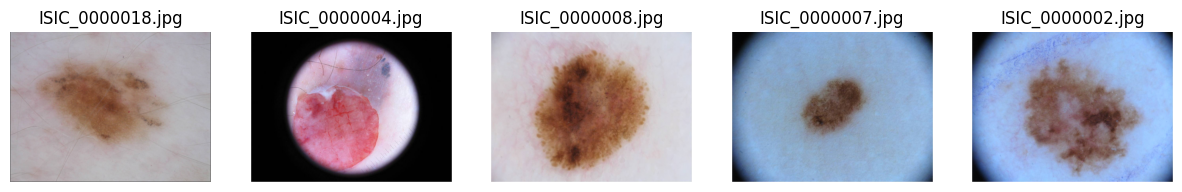

Train Masks Folder:


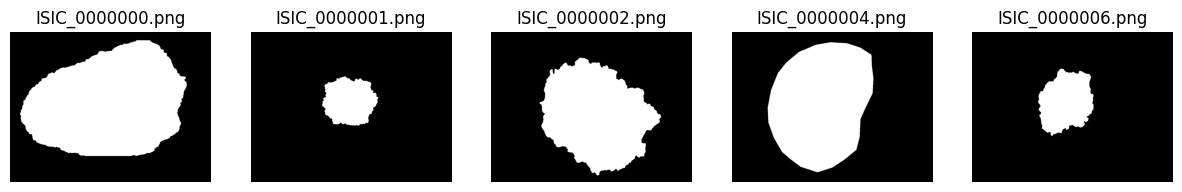

Test Folder:


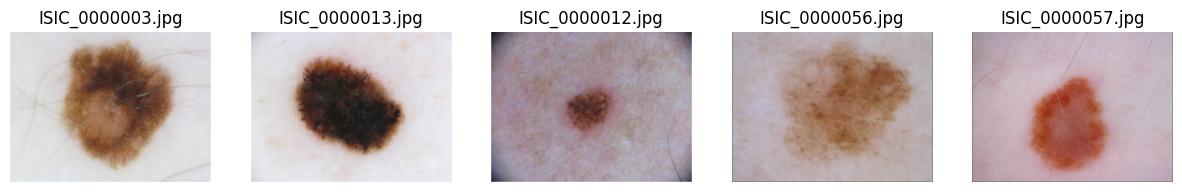

Test Masks Folder:


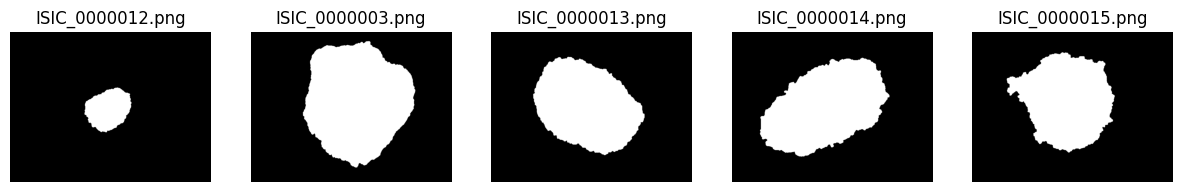

In [ ]:

print("Displaying 5 images from each folder:\n")
print("Train Folder:")
display_images(train_path)

print("Train Masks Folder:")
display_images(train_masks_path)

print("Test Folder:")
display_images(test_path)

print("Test Masks Folder:")
display_images(test_masks_path)


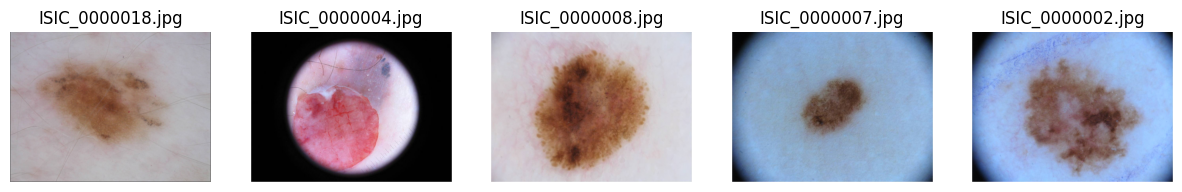

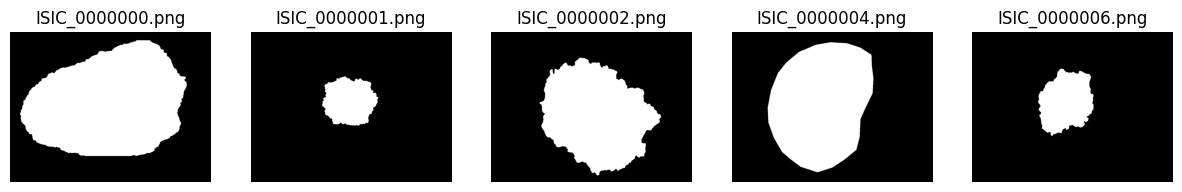

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class CustomDataset(Dataset):
    def __init__(self, image_folder, mask_folder, transform=None):
        self.image_folder = image_folder
        self.mask_folder = mask_folder
        self.transform = transform
        self.images = os.listdir(image_folder)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_folder, self.images[idx])
        mask_name = os.path.join(self.mask_folder, self.images[idx])

        image = cv2.imread(img_name)
        mask = cv2.imread(mask_name, cv2.IMREAD_GRAYSCALE)

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask


transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])


train_dataset = CustomDataset(train_path, train_masks_path, transform=transform)
test_dataset = CustomDataset(test_path, test_masks_path, transform=transform)


train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)


display_images(train_path)
display_images(train_masks_path)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.models import mobilenet_v2


In [ ]:
from torchvision import models

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Displaying 5 images from each folder:

Train Folder:


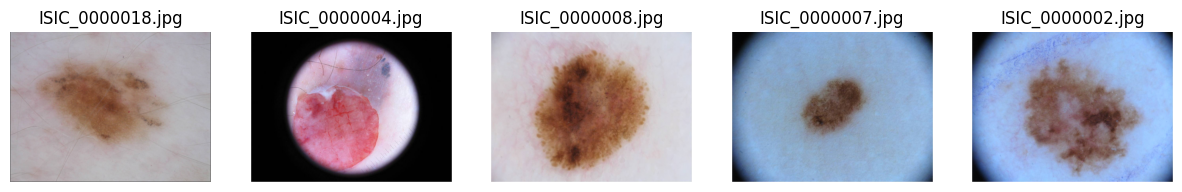

Train Masks Folder:


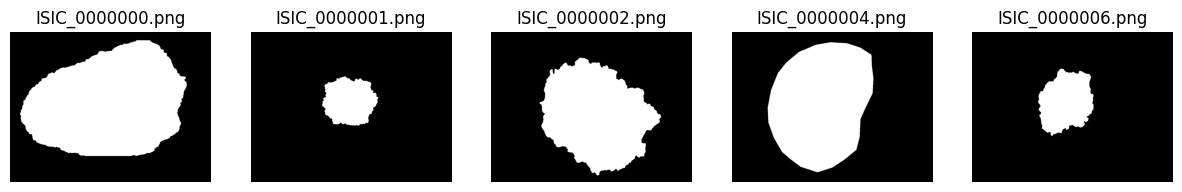

Test Folder:


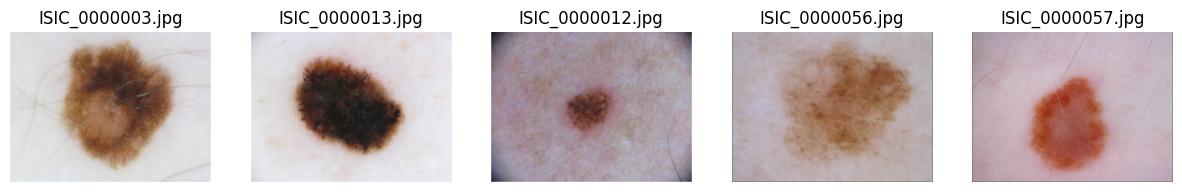

Test Masks Folder:


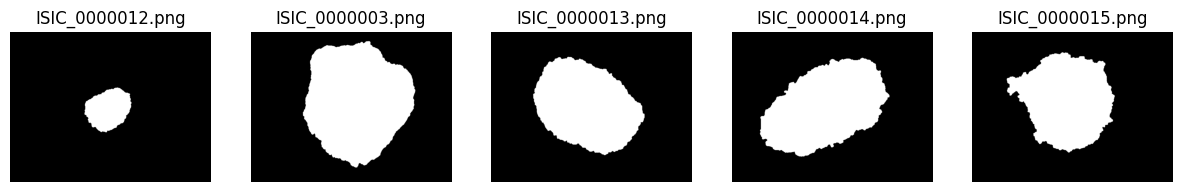

Epoch [1/5], Loss: 0.4866
Epoch [2/5], Loss: 0.4122
Epoch [3/5], Loss: 0.3820
Epoch [4/5], Loss: 0.3487
Epoch [5/5], Loss: 0.3296


In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import os
import cv2
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive')


dataset_path = '/content/drive/MyDrive/ISIC2016'


train_path = os.path.join(dataset_path, 'train')
train_masks_path = os.path.join(dataset_path, 'train_masks')
test_path = os.path.join(dataset_path, 'test')
test_masks_path = os.path.join(dataset_path, 'test_masks')


def display_images(folder_path, num_images=5):
    images = os.listdir(folder_path)[:num_images]
    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(images):
        image = cv2.imread(os.path.join(folder_path, image_name))
        plt.subplot(1, num_images, i+1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(image_name)
        plt.axis('off')
    plt.show()


print("Displaying 5 images from each folder:\n")
print("Train Folder:")
display_images(train_path)
print("Train Masks Folder:")
display_images(train_masks_path)
print("Test Folder:")
display_images(test_path)
print("Test Masks Folder:")
display_images(test_masks_path)


class CustomDataset(Dataset):
    def __init__(self, image_folder, mask_folder, transform=None):
        self.image_folder = image_folder
        self.mask_folder = mask_folder
        self.transform = transform
        self.images = [img for img in os.listdir(image_folder) if img.endswith('.jpg') or img.endswith('.png')]
        self.masks = [mask for mask in os.listdir(mask_folder) if mask.endswith('.jpg') or mask.endswith('.png')]


    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_folder, self.images[idx])
        mask_name = os.path.join(self.mask_folder, self.masks[idx])

        image = cv2.imread(img_name)
        mask = cv2.imread(mask_name, cv2.IMREAD_GRAYSCALE)

        if self.transform:
            if image is None or mask is None:
                raise ValueError(f"Failed to read image or mask: {img_name}")
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask


transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])


train_dataset = CustomDataset(train_path, train_masks_path, transform=transform)
test_dataset = CustomDataset(test_path, test_masks_path, transform=transform)


train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)


mobilenet = models.mobilenet_v2(pretrained=True)


for param in mobilenet.parameters():
    param.requires_grad = False


class CustomDecoder(nn.Module):
    def __init__(self, num_classes):
        super(CustomDecoder, self).__init__()
        self.conv1 = nn.Conv2d(1280, 256, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(256)
        self.conv2 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, num_classes, kernel_size=1)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(self.bn1(x))
        x = self.conv2(x)
        x = nn.functional.relu(self.bn2(x))
        x = self.conv3(x)
        return x


class SegmentationModel(nn.Module):
   def __init__(self, num_classes):
        super(SegmentationModel, self).__init__()
        self.encoder = mobilenet.features
        self.decoder = CustomDecoder(num_classes)
        self.final_conv = nn.Conv2d(num_classes, num_classes, kernel_size=1)

   def forward(self, x):

        x = self.encoder(x)

        x = self.decoder(x)

        x = self.final_conv(x)
        x = nn.functional.interpolate(x, size=(128, 128), mode='bilinear', align_corners=False)
        return x

num_classes = 1


model = SegmentationModel(num_classes)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.decoder.parameters(), lr=0.001)


num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, masks in train_dataloader:
        images, masks = images.to(device), masks.to(device)


        outputs = model(images)
        loss = criterion(outputs, masks)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_dataloader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")


model.eval()



torch.save(model.state_dict(), 'segmentation_model.pth')


In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np


Epoch [1/5], Training Loss: 0.3119
Epoch [1/5], Validation Loss: 0.4699
Epoch [2/5], Training Loss: 0.2932
Epoch [2/5], Validation Loss: 0.5158
Epoch [3/5], Training Loss: 0.2658
Epoch [3/5], Validation Loss: 0.4907
Epoch [4/5], Training Loss: 0.2496
Epoch [4/5], Validation Loss: 0.5138
Epoch [5/5], Training Loss: 0.2420
Epoch [5/5], Validation Loss: 0.5191


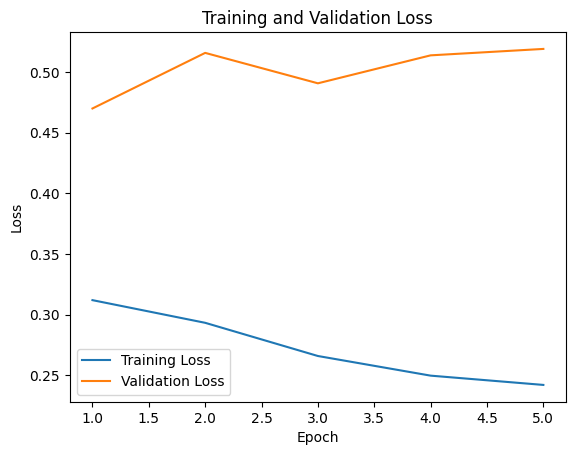

Average IoU: 0.4517
Average Dice Score: 0.6143


In [ ]:

test_losses = []


num_epochs = 5
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, masks in train_dataloader:
        images, masks = images.to(device), masks.to(device)


        outputs = model(images)
        loss = criterion(outputs, masks)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_dataloader.dataset)
    train_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_loss:.4f}")


    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, masks in test_dataloader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            loss = criterion(outputs, masks)
            val_loss += loss.item() * images.size(0)
    val_loss /= len(test_dataloader.dataset)
    test_losses.append(val_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss:.4f}")


plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


def calculate_iou_and_dice(pred, target):
    pred = pred.cpu().detach().numpy()
    target = target.cpu().detach().numpy()
    intersection = np.logical_and(pred, target)
    union = np.logical_or(pred, target)
    iou = np.sum(intersection) / np.sum(union)
    dice = (2 * np.sum(intersection)) / (np.sum(pred) + np.sum(target))
    return iou, dice


model.eval()
iou_scores = []
dice_scores = []

with torch.no_grad():
    for images, masks in test_dataloader:
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)
        outputs = torch.sigmoid(outputs)
        outputs[outputs > 0.5] = 1
        outputs[outputs <= 0.5] = 0

        for i in range(len(images)):
            iou, dice = calculate_iou_and_dice(outputs[i], masks[i])
            iou_scores.append(iou)
            dice_scores.append(dice)

avg_iou = np.mean(iou_scores)
avg_dice = np.mean(dice_scores)
print(f"Average IoU: {avg_iou:.4f}")
print(f"Average Dice Score: {avg_dice:.4f}")


torch.save(model.state_dict(), 'segmentation_model.pth')


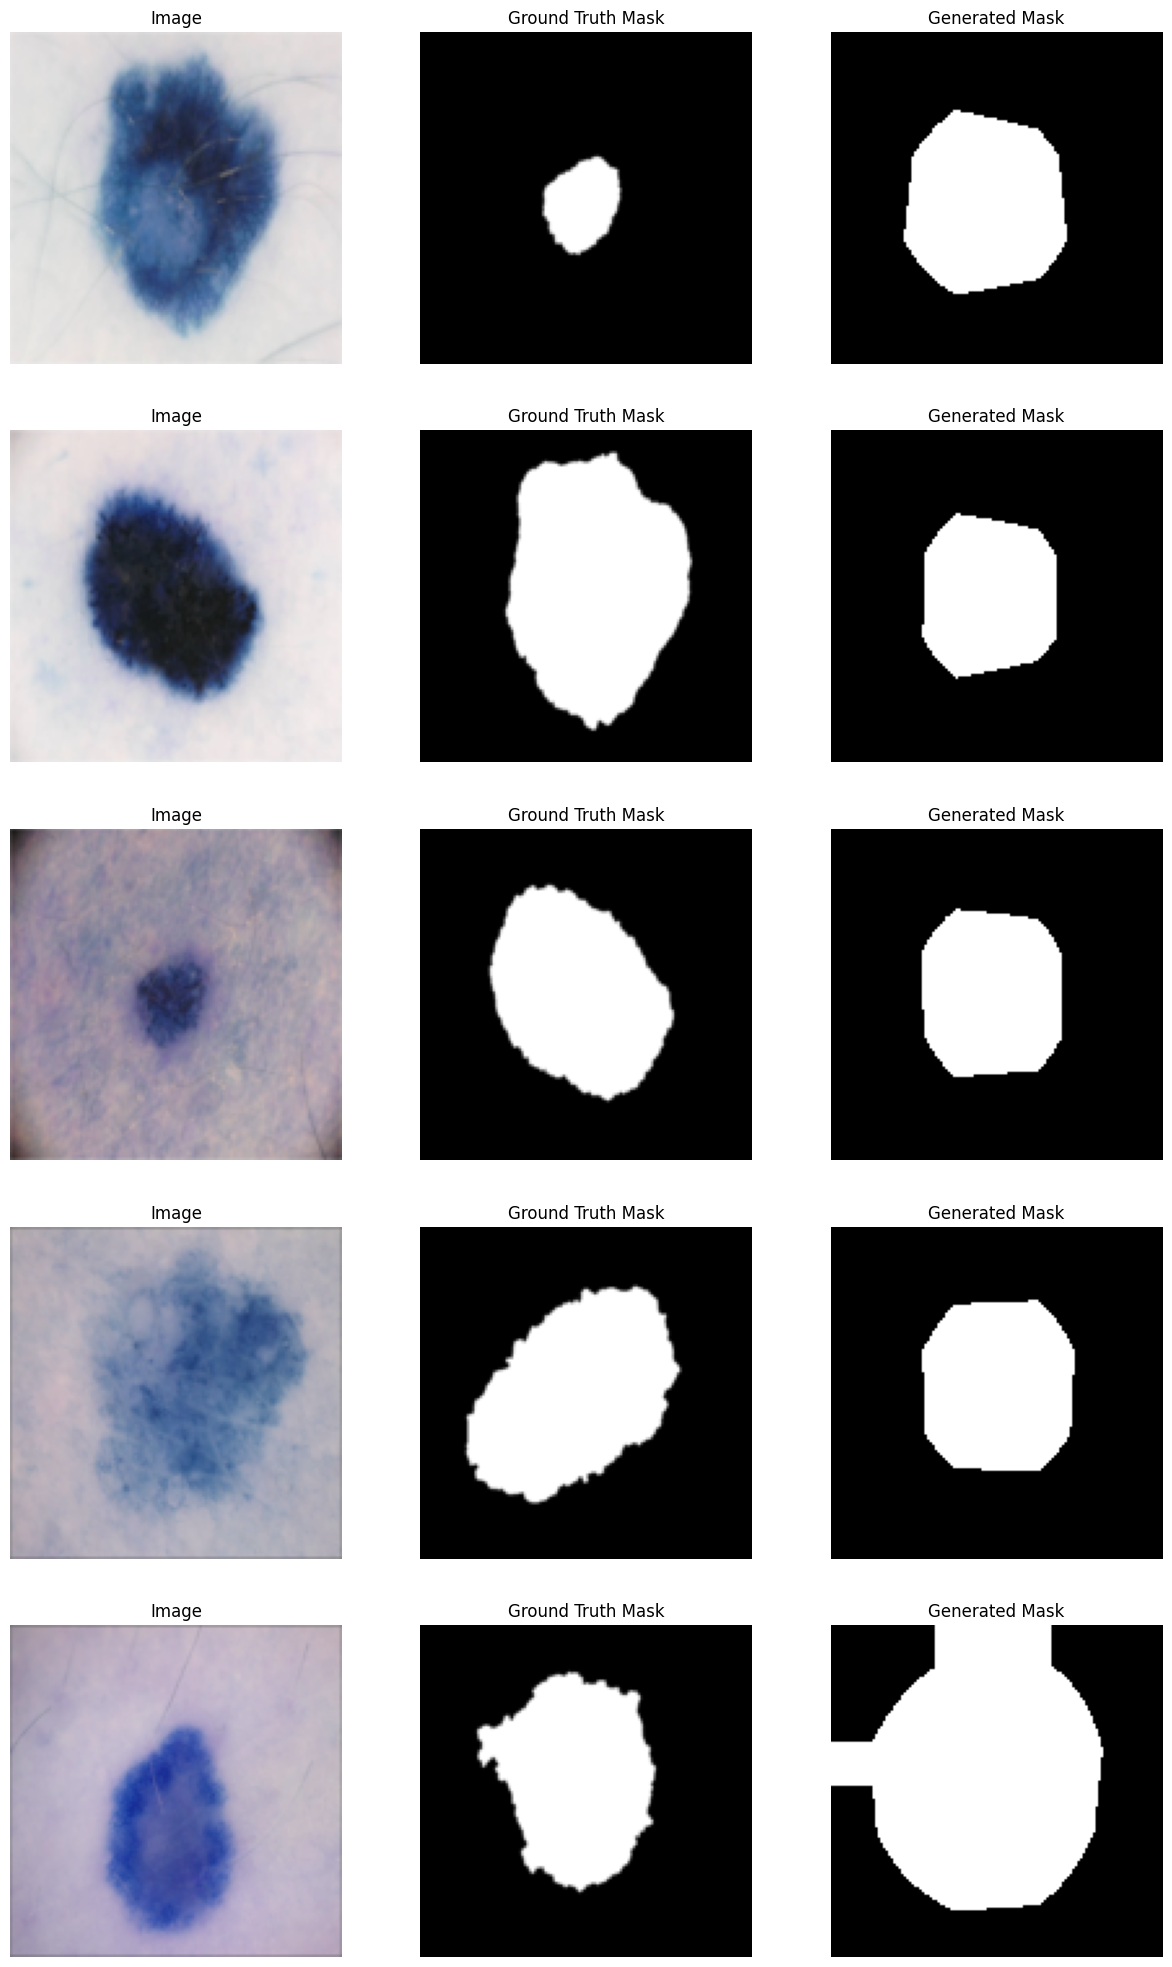

In [ ]:

model.eval()
iou_scores = []
dice_scores = []
sample_images = []
sample_masks = []
sample_outputs = []

with torch.no_grad():
    for images, masks in test_dataloader:
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)
        outputs = torch.sigmoid(outputs)
        outputs[outputs > 0.5] = 1
        outputs[outputs <= 0.5] = 0

        sample_images.extend(images.cpu().numpy())
        sample_masks.extend(masks.cpu().numpy())
        sample_outputs.extend(outputs.cpu().numpy())

        for i in range(len(images)):
            iou, dice = calculate_iou_and_dice(outputs[i], masks[i])
            iou_scores.append(iou)
            dice_scores.append(dice)

avg_iou = np.mean(iou_scores)
avg_dice = np.mean(dice_scores)



def visualize_samples(images, masks, outputs, num_samples=5):
    plt.figure(figsize=(15, 5 * num_samples))
    for i in range(num_samples):
        plt.subplot(num_samples, 3, 3*i + 1)
        plt.imshow(images[i].transpose(1, 2, 0))
        plt.title('Image')
        plt.axis('off')

        plt.subplot(num_samples, 3, 3*i + 2)
        plt.imshow(masks[i].squeeze(), cmap='gray')
        plt.title('Ground Truth Mask')
        plt.axis('off')

        plt.subplot(num_samples, 3, 3*i + 3)
        plt.imshow(outputs[i].squeeze(), cmap='gray')
        plt.title('Generated Mask')
        plt.axis('off')
    plt.show()


visualize_samples(sample_images, sample_masks, sample_outputs)


Mounted at /content/drive
Displaying 5 images from each folder:

Train Folder:


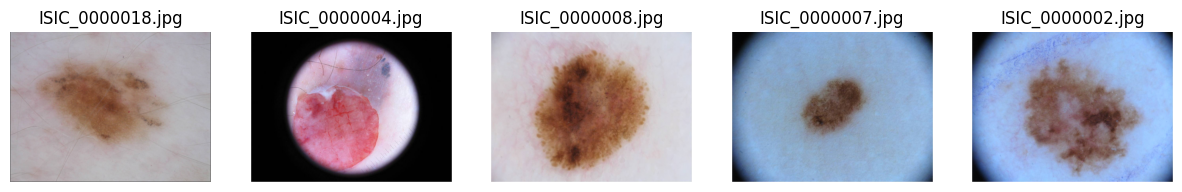

Train Masks Folder:


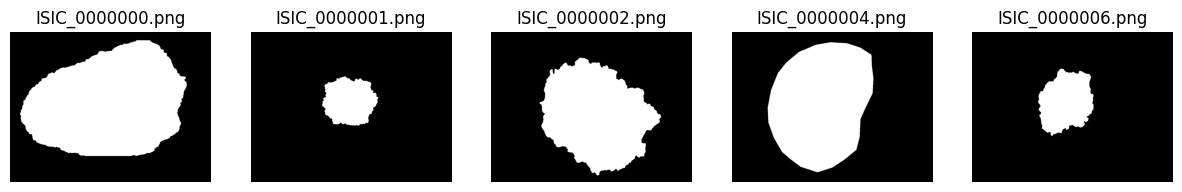

Test Folder:


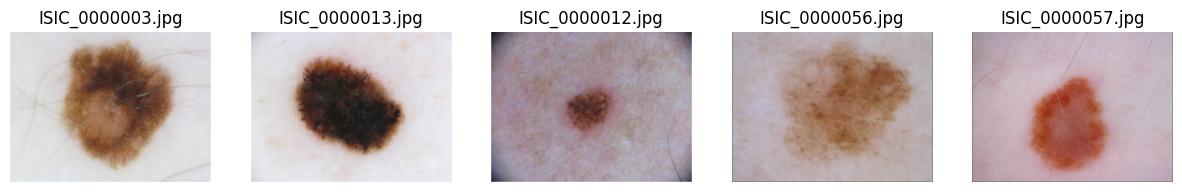

Test Masks Folder:


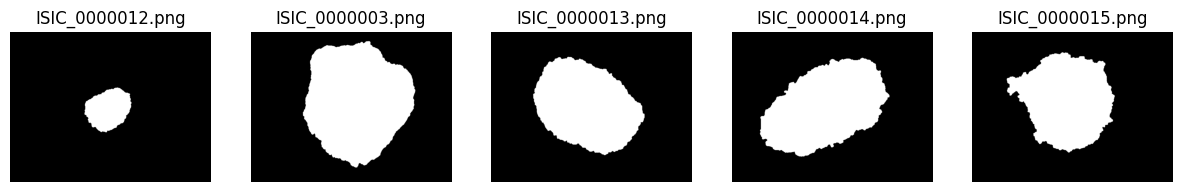

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 93.9MB/s]


Epoch [1/5], Loss: 0.4396
Epoch [2/5], Loss: 0.3712
Epoch [3/5], Loss: 0.3167
Epoch [4/5], Loss: 0.2770
Epoch [5/5], Loss: 0.2628


In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np


from google.colab import drive
drive.mount('/content/drive')


dataset_path = '/content/drive/MyDrive/ISIC2016'


train_path = os.path.join(dataset_path, 'train')
train_masks_path = os.path.join(dataset_path, 'train_masks')
test_path = os.path.join(dataset_path, 'test')
test_masks_path = os.path.join(dataset_path, 'test_masks')


def display_images(folder_path, num_images=5):
    images = os.listdir(folder_path)[:num_images]
    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(images):
        image = cv2.imread(os.path.join(folder_path, image_name))
        plt.subplot(1, num_images, i+1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(image_name)
        plt.axis('off')
    plt.show()


print("Displaying 5 images from each folder:\n")
print("Train Folder:")
display_images(train_path)
print("Train Masks Folder:")
display_images(train_masks_path)
print("Test Folder:")
display_images(test_path)
print("Test Masks Folder:")
display_images(test_masks_path)


class CustomDataset(Dataset):
    def __init__(self, image_folder, mask_folder, transform=None):
        self.image_folder = image_folder
        self.mask_folder = mask_folder
        self.transform = transform
        self.images = [img for img in os.listdir(image_folder) if img.endswith('.jpg') or img.endswith('.png')]
        self.masks = [mask for mask in os.listdir(mask_folder) if mask.endswith('.jpg') or mask.endswith('.png')]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_folder, self.images[idx])
        mask_name = os.path.join(self.mask_folder, self.masks[idx])

        image = cv2.imread(img_name)
        mask = cv2.imread(mask_name, cv2.IMREAD_GRAYSCALE)

        if self.transform:
            if image is None or mask is None:
                raise ValueError(f"Failed to read image or mask: {img_name}")
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask


transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])


train_dataset = CustomDataset(train_path, train_masks_path, transform=transform)
test_dataset = CustomDataset(test_path, test_masks_path, transform=transform)


train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)


mobilenet = models.mobilenet_v2(pretrained=True)


for param in mobilenet.parameters():
    param.requires_grad = False


class CustomDecoder(nn.Module):
    def __init__(self, num_classes):
        super(CustomDecoder, self).__init__()
        self.conv1 = nn.Conv2d(1280, 256, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(256)
        self.conv2 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, num_classes, kernel_size=1)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(self.bn1(x))
        x = self.conv2(x)
        x = nn.functional.relu(self.bn2(x))
        x = self.conv3(x)
        return x


class SegmentationModel(nn.Module):
    def __init__(self, num_classes):
        super(SegmentationModel, self).__init__()
        self.encoder = mobilenet.features
        self.decoder = CustomDecoder(num_classes)
        self.final_conv = nn.Conv2d(num_classes, num_classes, kernel_size=1)

    def forward(self, x):

        x = self.encoder(x)

        x = self.decoder(x)

        x = self.final_conv(x)
        x = nn.functional.interpolate(x, size=(128, 128), mode='bilinear', align_corners=False)
        return x


num_classes = 1


model = SegmentationModel(num_classes)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


for param in model.encoder.parameters():
    param.requires_grad = True


criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam([
    {'params': model.encoder.parameters(), 'lr': 0.0001},
    {'params': model.decoder.parameters(), 'lr': 0.001}
])


num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, masks in train_dataloader:
        images, masks = images.to(device), masks.to(device)


        outputs = model(images)
        loss = criterion(outputs, masks)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_dataloader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")


In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np


from google.colab import drive
drive.mount('/content/drive')


dataset_path = '/content/drive/MyDrive/ISIC2016'


train_path = os.path.join(dataset_path, 'train')
train_masks_path = os.path.join(dataset_path, 'train_masks')
test_path = os.path.join(dataset_path, 'test')
test_masks_path = os.path.join(dataset_path, 'test_masks')


def display_images(folder_path, num_images=5):
    images = os.listdir(folder_path)[:num_images]
    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(images):
        image = cv2.imread(os.path.join(folder_path, image_name))
        plt.subplot(1, num_images, i+1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(image_name)
        plt.axis('off')
    plt.show()



class CustomDataset(Dataset):
    def __init__(self, image_folder, mask_folder, transform=None):
        self.image_folder = image_folder
        self.mask_folder = mask_folder
        self.transform = transform
        self.images = [img for img in os.listdir(image_folder) if img.endswith('.jpg') or img.endswith('.png')]
        self.masks = [mask for mask in os.listdir(mask_folder) if mask.endswith('.jpg') or mask.endswith('.png')]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_folder, self.images[idx])
        mask_name = os.path.join(self.mask_folder, self.masks[idx])

        image = cv2.imread(img_name)
        mask = cv2.imread(mask_name, cv2.IMREAD_GRAYSCALE)

        if self.transform:
            if image is None or mask is None:
                raise ValueError(f"Failed to read image or mask: {img_name}")
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask


transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])


train_dataset = CustomDataset(train_path, train_masks_path, transform=transform)
test_dataset = CustomDataset(test_path, test_masks_path, transform=transform)


train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)


mobilenet = models.mobilenet_v2(pretrained=True)


for param in mobilenet.parameters():
    param.requires_grad = False


class CustomDecoder(nn.Module):
    def __init__(self, num_classes):
        super(CustomDecoder, self).__init__()
        self.conv1 = nn.Conv2d(1280, 256, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(256)
        self.conv2 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, num_classes, kernel_size=1)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(self.bn1(x))
        x = self.conv2(x)
        x = nn.functional.relu(self.bn2(x))
        x = self.conv3(x)
        return x


class SegmentationModel(nn.Module):
    def __init__(self, num_classes):
        super(SegmentationModel, self).__init__()
        self.encoder = mobilenet.features
        self.decoder = CustomDecoder(num_classes)
        self.final_conv = nn.Conv2d(num_classes, num_classes, kernel_size=1)

    def forward(self, x):

        x = self.encoder(x)

        x = self.decoder(x)

        x = self.final_conv(x)
        x = nn.functional.interpolate(x, size=(128, 128), mode='bilinear', align_corners=False)
        return x


num_classes = 1


model = SegmentationModel(num_classes)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


for param in model.encoder.parameters():
    param.requires_grad = True


criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam([
    {'params': model.encoder.parameters(), 'lr': 0.0001},
    {'params': model.decoder.parameters(), 'lr': 0.001}
])


num_epochs = 5
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, masks in train_dataloader:
        images, masks = images.to(device), masks.to(device)


        outputs = model(images)
        loss = criterion(outputs, masks)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_dataloader.dataset)
    train_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_loss:.4f}")


    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, masks in test_dataloader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            loss = criterion(outputs, masks)
            val_loss += loss.item() * images.size(0)
    val_loss /= len(test_dataloader.dataset)
    test_losses.append(val_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss:.4f}")




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/5], Training Loss: 0.4254
Epoch [1/5], Validation Loss: 0.4204
Epoch [2/5], Training Loss: 0.3672
Epoch [2/5], Validation Loss: 0.4260
Epoch [3/5], Training Loss: 0.3081
Epoch [3/5], Validation Loss: 0.4661
Epoch [4/5], Training Loss: 0.2912
Epoch [4/5], Validation Loss: 0.4639
Epoch [5/5], Training Loss: 0.2642
Epoch [5/5], Validation Loss: 0.4915


Average IoU: 0.4478
Average Dice Score: 0.6029


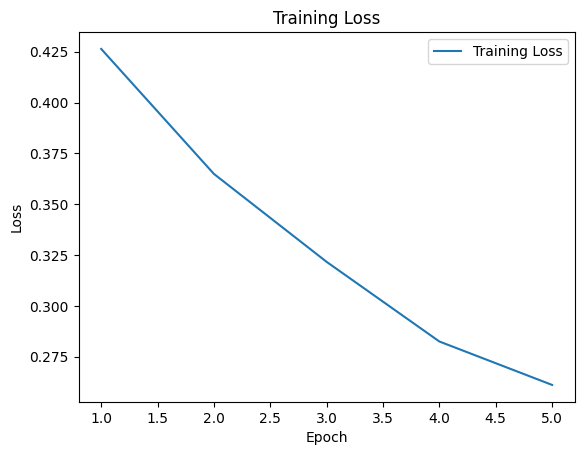

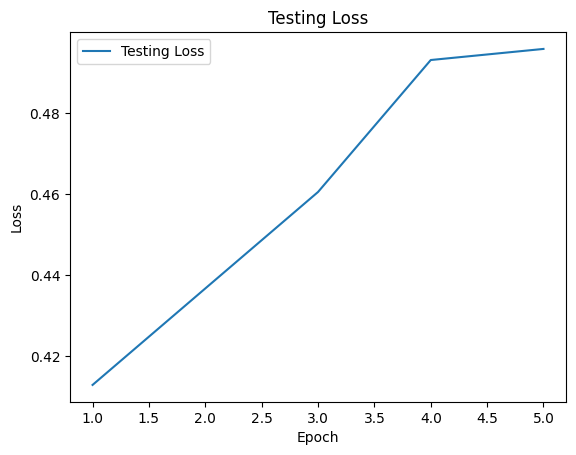

In [ ]:

def calculate_iou_and_dice(pred, target):
    pred = pred.cpu().detach().numpy()
    target = target.cpu().detach().numpy()
    intersection = np.logical_and(pred, target)
    union = np.logical_or(pred, target)
    iou = np.sum(intersection) / np.sum(union)
    dice = (2 * np.sum(intersection)) / (np.sum(pred) + np.sum(target))
    return iou, dice


model.eval()
iou_scores = []
dice_scores = []

with torch.no_grad():
    for images, masks in test_dataloader:
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)
        outputs = torch.sigmoid(outputs)
        outputs[outputs > 0.5] = 1
        outputs[outputs <= 0.5] = 0

        for i in range(len(images)):
            iou, dice = calculate_iou_and_dice(outputs[i], masks[i])
            iou_scores.append(iou)
            dice_scores.append(dice)

avg_iou = np.mean(iou_scores)
avg_dice = np.mean(dice_scores)
print(f"Average IoU: {avg_iou:.4f}")
print(f"Average Dice Score: {avg_dice:.4f}")


plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()


plt.plot(range(1, num_epochs+1), test_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Testing Loss')
plt.legend()
plt.show()


Average IoU: 0.4478
Average Dice Score: 0.6029


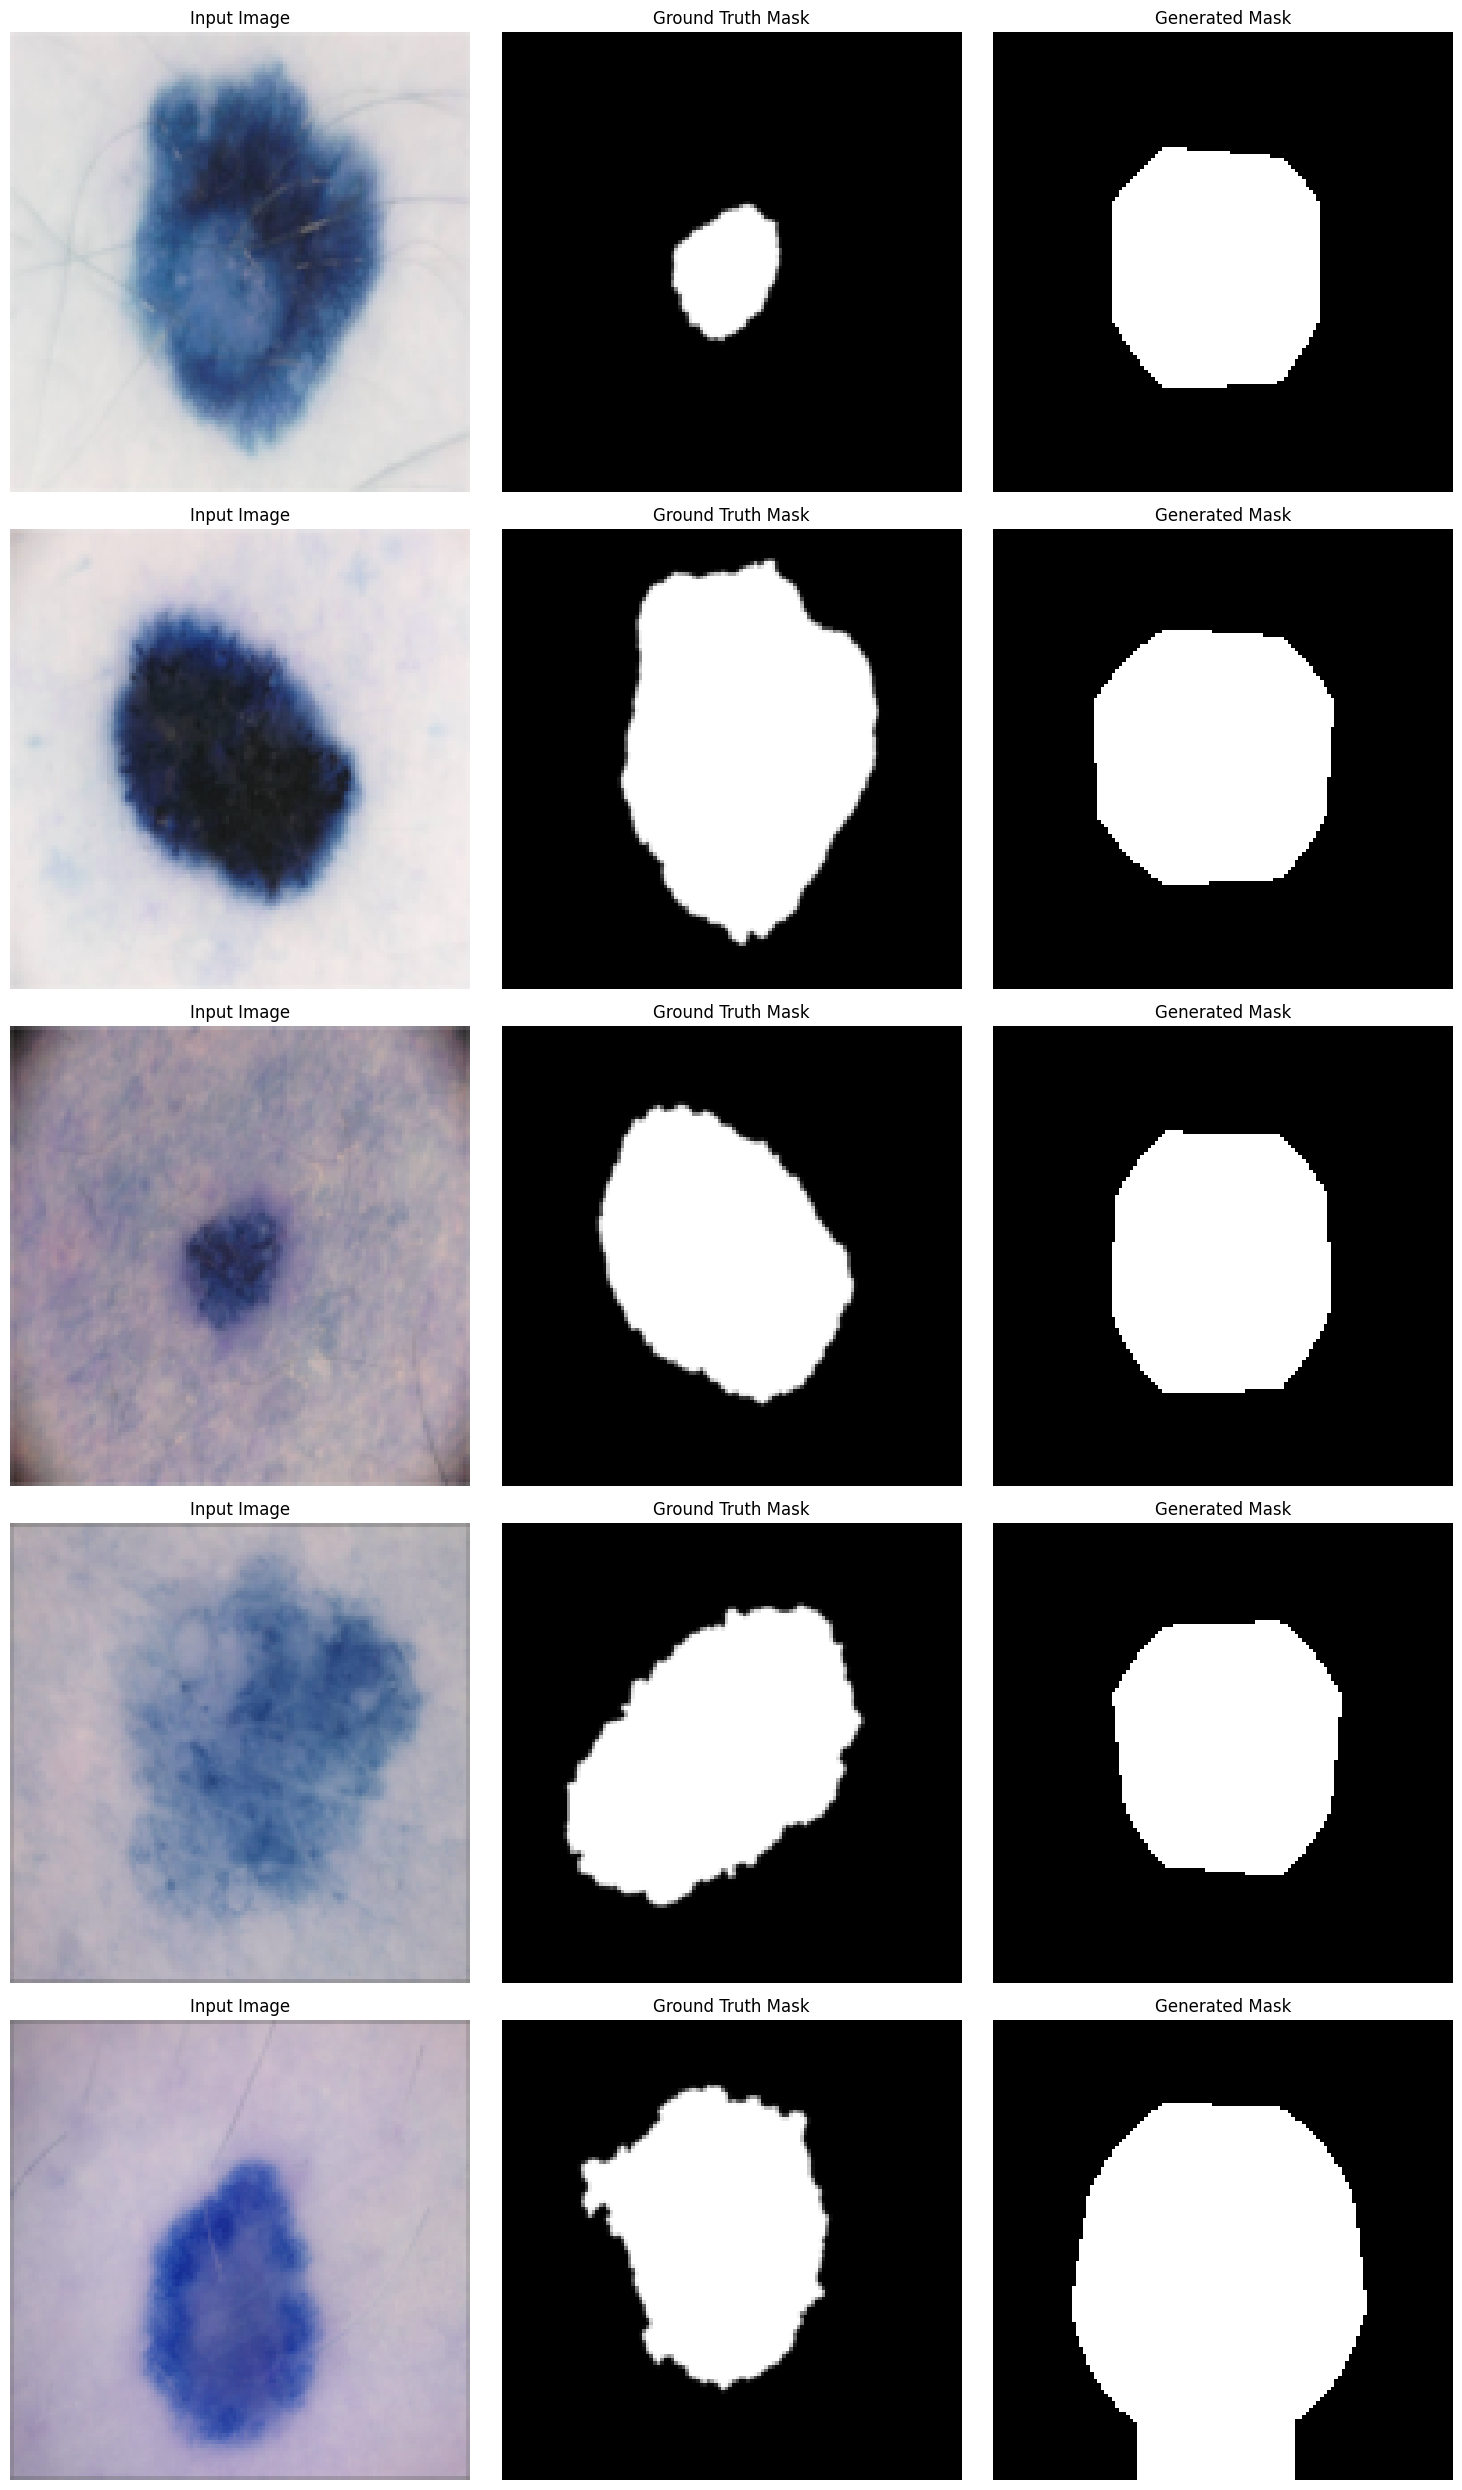

In [ ]:

def visualize_samples(images, masks, outputs, num_samples=5):
    num_available_samples = min(len(images), len(masks), len(outputs), num_samples)
    plt.figure(figsize=(15, 5*num_available_samples))
    for i in range(num_available_samples):
        plt.subplot(num_available_samples, 3, i*3 + 1)
        plt.imshow(images[i].permute(1, 2, 0).cpu().numpy())
        plt.title('Input Image')
        plt.axis('off')

        plt.subplot(num_available_samples, 3, i*3 + 2)
        plt.imshow(masks[i].squeeze().cpu().numpy(), cmap='gray')
        plt.title('Ground Truth Mask')
        plt.axis('off')

        plt.subplot(num_available_samples, 3, i*3 + 3)
        plt.imshow(outputs[i].squeeze().cpu().numpy(), cmap='gray')
        plt.title('Generated Mask')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


model.eval()
iou_scores = []
dice_scores = []
sample_images = []
sample_masks = []
sample_outputs = []

with torch.no_grad():
    for images, masks in test_dataloader:
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)
        outputs = torch.sigmoid(outputs)
        outputs[outputs > 0.5] = 1
        outputs[outputs <= 0.5] = 0

        for i in range(len(images)):
            iou, dice = calculate_iou_and_dice(outputs[i], masks[i])
            iou_scores.append(iou)
            dice_scores.append(dice)
            sample_images.append(images[i].cpu())
            sample_masks.append(masks[i].cpu())
            sample_outputs.append(outputs[i].cpu())




visualize_samples(sample_images, sample_masks, sample_outputs)


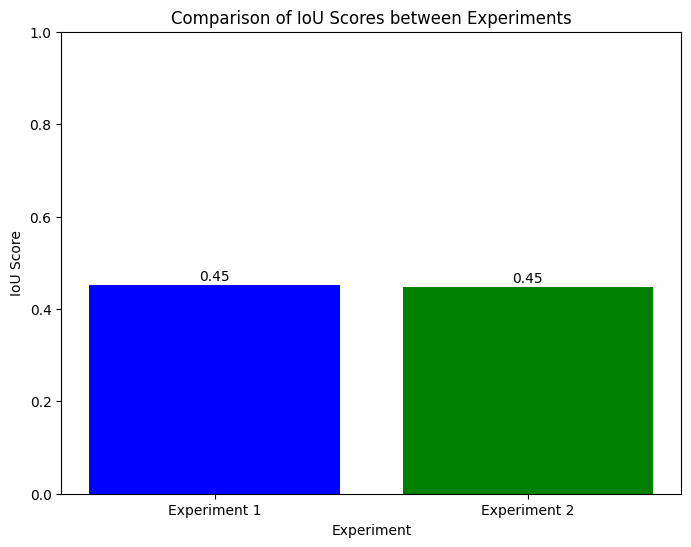

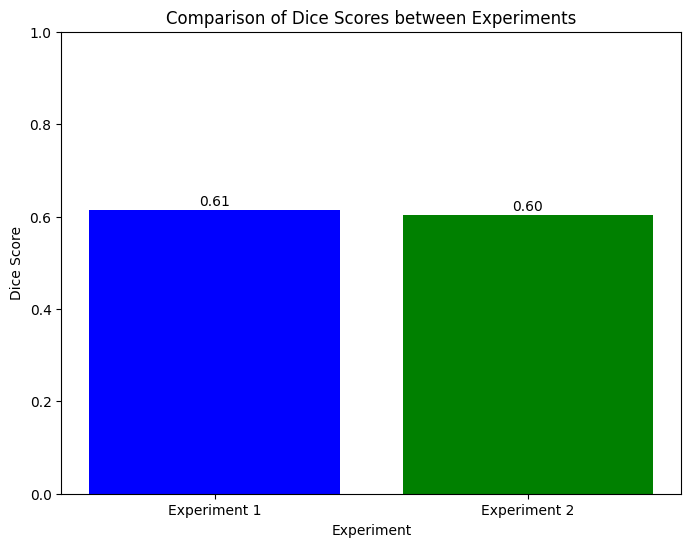

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


experiment1_iou = 0.4517
experiment1_dice = 0.6143


experiment2_iou = 0.4478
experiment2_dice =  0.6029



plt.figure(figsize=(8, 6))
labels = ['Experiment 1', 'Experiment 2']
iou_scores = [experiment1_iou, experiment2_iou]
plt.bar(labels, iou_scores, color=['blue', 'green'])
plt.xlabel('Experiment')
plt.ylabel('IoU Score')
plt.title('Comparison of IoU Scores between Experiments')
plt.ylim(0, 1)
for i in range(len(labels)):
    plt.text(i, iou_scores[i] + 0.01, f'{iou_scores[i]:.2f}', ha='center')
plt.show()


plt.figure(figsize=(8, 6))
dice_scores = [experiment1_dice, experiment2_dice]
plt.bar(labels, dice_scores, color=['blue', 'green'])
plt.xlabel('Experiment')
plt.ylabel('Dice Score')
plt.title('Comparison of Dice Scores between Experiments')
plt.ylim(0, 1)
for i in range(len(labels)):
    plt.text(i, dice_scores[i] + 0.01, f'{dice_scores[i]:.2f}', ha='center')
plt.show()
